In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14250 (delta 0), reused 2 (delta 0), pack-reused 14240
Receiving objects: 100% (14250/14250), 12.86 MiB | 19.81 MiB/s, done.
Resolving deltas: 100% (9677/9677), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!cp '/content/drive/My Drive/yolo/WarDetection/yolov3_warDetection_final.weights' '/content/darknet'

In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

 20160505_145406.jpg	   instagram.rar
 animals		  'My Drive'
'Colab Notebooks'	   OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg
 DSC_0006.JPG		   Tank_Nemat
 DSC_0011.JPG		   Tank.zip
'Image data set (1).zip'   Untitled-1.psd
'Image data set.zip'	   yolo
 IMG_20160405_194421.jpg  'zomorod 2.png'
 IMG_20160505_115840.jpg  'سند بدون عنوان.gdoc'


In [8]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [9]:
!cp '/mydrive/yolo/WarDetection/yolov3_warDetection.cfg' ./cfg

In [10]:
!cp '/mydrive/yolo/WarDetection/war.names' ./data
!cp '/mydrive/yolo/WarDetection/war.data'  ./data

In [ ]:
!cp '/mydrive/yolo/WarDetection/testing/helicopter.jpg'  ./data
!cp '/mydrive/yolo/WarDetection/testing/tank.jpg'  ./data
!cp '/mydrive/yolo/WarDetection/testing/boat.jpg'  ./data
!cp '/mydrive/yolo/WarDetection/testing/soldier.jpg'  ./data
!cp '/mydrive/yolo/WarDetection/testing/weapon.jpg'  ./data

!cp '/mydrive/yolo/WarDetection/testing/test.jpg'  ./data

In [ ]:
!cp '/mydrive/yolo/WarDetection/testing/test1.jpeg'  ./data
!cp '/mydrive/yolo/WarDetection/testing/test3.jpeg'  ./data

cp: cannot stat '/mydrive/yolo/WarDetection/testing/test2.jpeg': No such file or directory


In [ ]:
!cp '/mydrive/yolo/WarDetection/testing/test7.jpeg'  ./data
!cp '/mydrive/yolo/WarDetection/testing/test8.jpeg'  ./data
!cp '/mydrive/yolo/WarDetection/testing/test10.jpeg'  ./data
!cp '/mydrive/yolo/WarDetection/testing/test9.jpeg'  ./data

In [ ]:
!cp '/mydrive/yolo/WarDetection/testing/test2.mp4'  ./data
!cp '/mydrive/yolo/WarDetection/testing/test1.mp4'  ./data

In [ ]:
!cp '/mydrive/yolo/WarDetection/testing/test3.mp4'  ./data
!cp '/mydrive/yolo/WarDetection/testing/test4.mp4'  ./data

In [ ]:
!cp '/mydrive/yolo/WarDetection/testing/test5.mp4'  ./data
!cp '/mydrive/yolo/WarDetection/testing/test6.mp4'  ./data
!cp '/mydrive/yolo/WarDetection/testing/test7.mp4'  ./data

In [11]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_warDetection.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_warDetection.cfg
%cd ..


/content/darknet/cfg
/content/darknet


In [12]:
%cd data
!rm coco.names
!mv war.names ./coco.names
!cp '/mydrive/yolo/WarDetection/war.names' ./data
%cd ..


/content/darknet/data
/content/darknet


[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 S

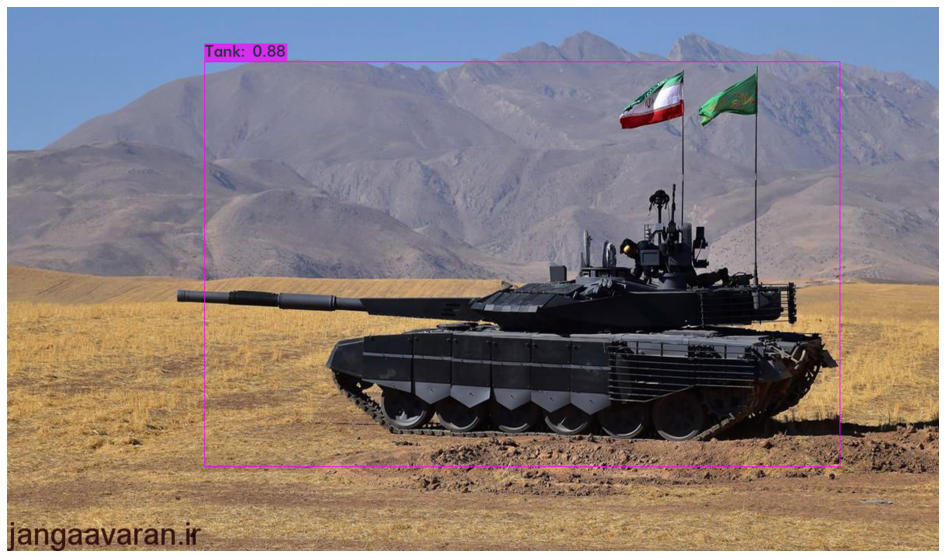

In [14]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3_warDetection.cfg yolov3_warDetection_final.weights test8.jpg
imShow('predictions.jpg')

In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detector demo data/war.data cfg/yolov3_warDetection.cfg yolov3_warDetection_final.weights /content/darknet/data/test7.mp4 -dont_show -i 0 -out_filename out4.avi


[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut